In [51]:
#Importing the required libaraies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
# Read the CSV file into a DataFrame
df = pd.read_csv("salaries.csv")

# Display the first few rows of the DataFrame
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [54]:
# Separate the inputs and target from the dataframe
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

# Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
LE = LabelEncoder()


In [55]:
# Apply LabelEncoder to each column in inputs
encoded_inputs_df = inputs.apply(LE.fit_transform)

# Rename the columns of the encoded dataframe
encoded_inputs_df = encoded_inputs_df.rename(columns=lambda x: x + '_encoded')

# Concatenate the original inputs dataframe with the encoded columns
combined_df = pd.concat([inputs, encoded_inputs_df], axis=1)




In [56]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split as tts

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = tts(encoded_inputs_df, target, test_size=0.2)

# Import DecisionTreeClassifier from sklearn
from sklearn import tree

# Initialize the DecisionTreeClassifier
model = tree.DecisionTreeClassifier()

# Train the model using the training data
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
model.score(x_test,y_test)

0.75

In [58]:
predicted_sal=model.predict(x_test)

In [59]:
list(map(lambda x: ">100k" if x==1 else "<=100k", predicted_sal))

['<=100k', '>100k', '>100k', '>100k']

In [60]:
enc_pred_sal=model.predict(encoded_inputs_df)
str_pred_sal=list(map(lambda x: ">100k" if x==1 else "<=100k",enc_pred_sal))

In [61]:
for k in range(0,len(str_pred_sal)):
    print(f"Predicted salary for {inputs.iloc[k]} is {str_pred_sal[k]}")

Predicted salary for company             google
job        sales executive
degree           bachelors
Name: 0, dtype: object is <=100k
Predicted salary for company             google
job        sales executive
degree             masters
Name: 1, dtype: object is <=100k
Predicted salary for company              google
job        business manager
degree            bachelors
Name: 2, dtype: object is >100k
Predicted salary for company              google
job        business manager
degree              masters
Name: 3, dtype: object is >100k
Predicted salary for company                 google
job        computer programmer
degree               bachelors
Name: 4, dtype: object is <=100k
Predicted salary for company                 google
job        computer programmer
degree                 masters
Name: 5, dtype: object is <=100k
Predicted salary for company         abc pharma
job        sales executive
degree             masters
Name: 6, dtype: object is <=100k
Predicted salary for compan

In [62]:
pred_df=pd.DataFrame({

"Encoded_pred_salary": enc_pred_sal,
"String_pred_salary": str_pred_sal,

})

final_df=pd.concat([combined_df,pred_df],axis=1)
final_df["salary_more_than_100k"]=target
final_df 

,company,job,degree,company_encoded,job_encoded,degree_encoded,Encoded_pred_salary,String_pred_salary,salary_more_than_100k
0,google,sales executive,bachelors,2,2,0,0,<=100k,0
1,google,sales executive,masters,2,2,1,0,<=100k,0
2,google,business manager,bachelors,2,0,0,1,>100k,1
3,google,business manager,masters,2,0,1,1,>100k,1
4,google,computer programmer,bachelors,2,1,0,0,<=100k,0
5,google,computer programmer,masters,2,1,1,0,<=100k,1
6,abc pharma,sales executive,masters,0,2,1,0,<=100k,0
7,abc pharma,computer programmer,bachelors,0,1,0,0,<=100k,0
8,abc pharma,business manager,bachelors,0,0,0,0,<=100k,0
9,abc pharma,business manager,masters,0,0,1,1,>100k,1


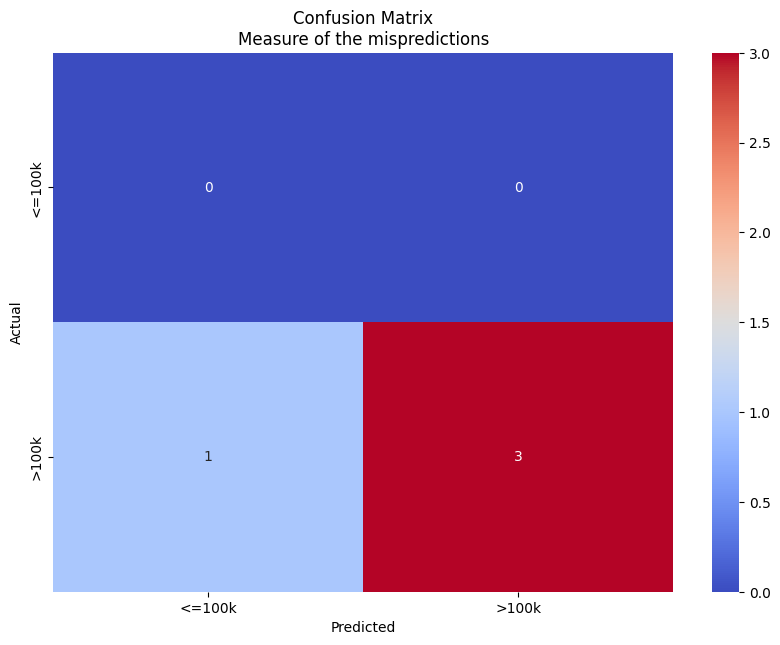

In [63]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,predicted_sal)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap='coolwarm',xticklabels=['<=100k','>100k'],yticklabels=['<=100k','>100k'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nMeasure of the mispredictions')
plt.show()


In [65]:
final_df

,company,job,degree,company_encoded,job_encoded,degree_encoded,Encoded_pred_salary,String_pred_salary,salary_more_than_100k
0,google,sales executive,bachelors,2,2,0,0,<=100k,0
1,google,sales executive,masters,2,2,1,0,<=100k,0
2,google,business manager,bachelors,2,0,0,1,>100k,1
3,google,business manager,masters,2,0,1,1,>100k,1
4,google,computer programmer,bachelors,2,1,0,0,<=100k,0
5,google,computer programmer,masters,2,1,1,0,<=100k,1
6,abc pharma,sales executive,masters,0,2,1,0,<=100k,0
7,abc pharma,computer programmer,bachelors,0,1,0,0,<=100k,0
8,abc pharma,business manager,bachelors,0,0,0,0,<=100k,0
9,abc pharma,business manager,masters,0,0,1,1,>100k,1


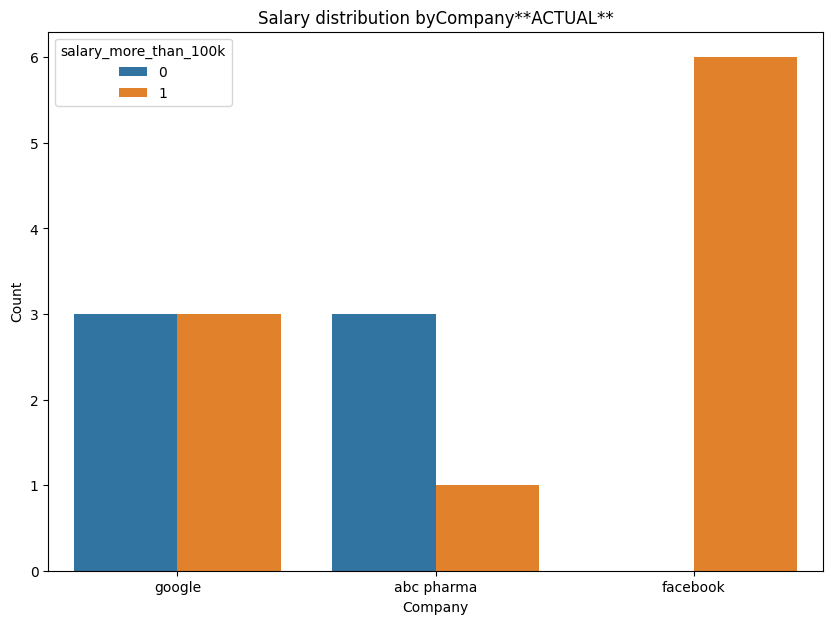

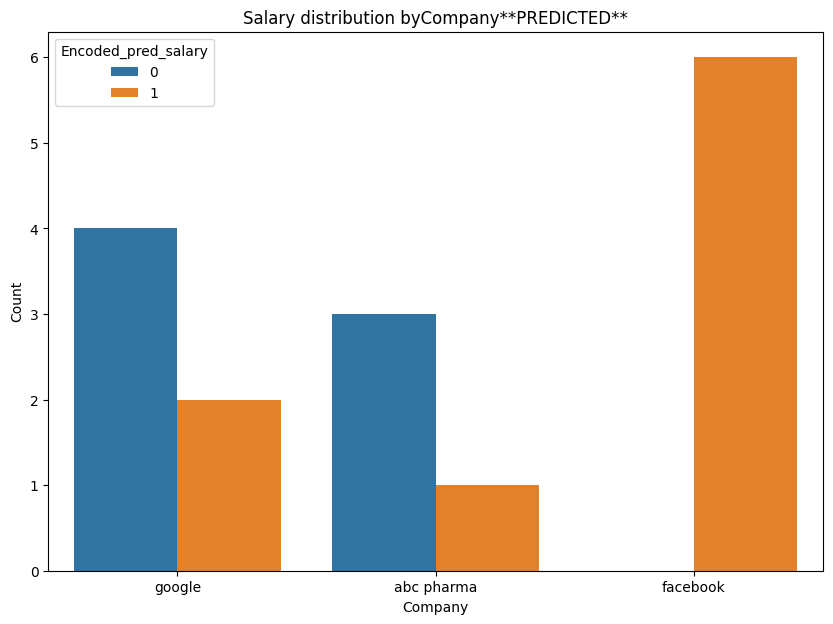

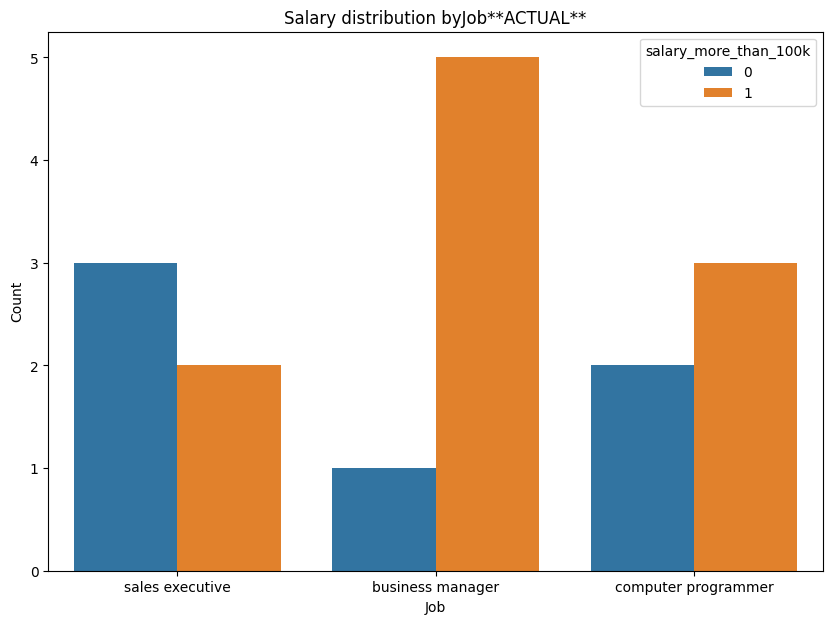

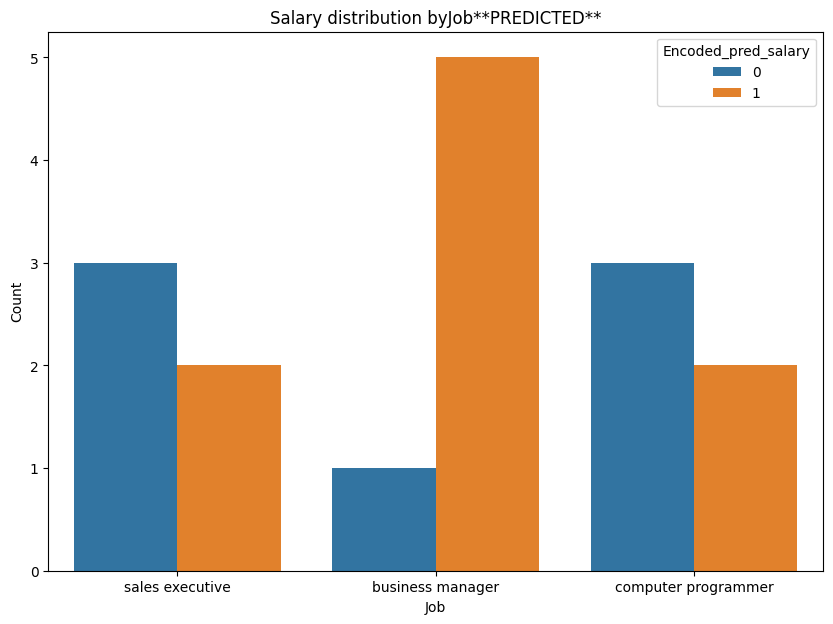

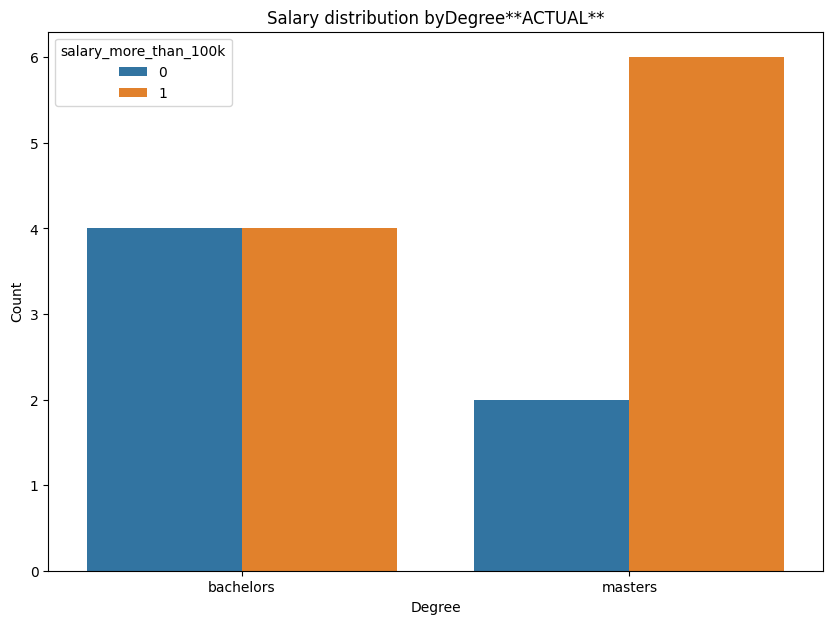

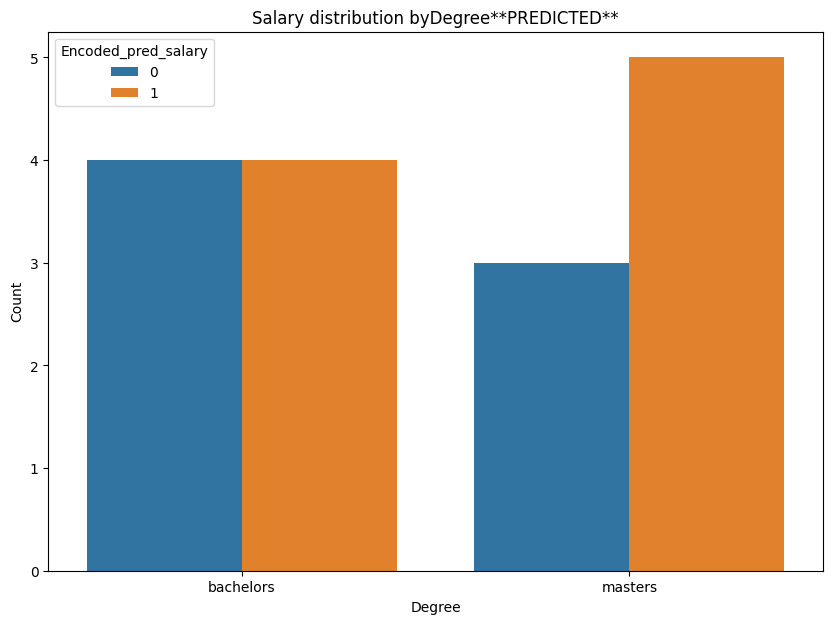

In [67]:
columns_to_plot = ['company', 'job', 'degree']

for column in columns_to_plot:
    plt.figure(figsize=(10,7))
    sns.countplot (data=final_df,x=column,hue='salary_more_than_100k') # type: ignore
    plt.title(f'Salary distribution by{column.capitalize()}**ACTUAL**')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(10,7))
    sns.countplot (data=final_df,x=column,hue='Encoded_pred_salary') # type: ignore
    plt.title(f'Salary distribution by{column.capitalize()}**PREDICTED**')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.show()

